In [48]:
import nltk
import numpy as np
import pandas as pd
import re
import seaborn as sns
from bangla_linga import gender_prediction as gp
import os
from google.cloud import translate
from google.cloud import storage
from nltk.tokenize import sent_tokenize, word_tokenize
import editdistance

In [3]:
df = pd.read_csv('file_big.csv')

In [5]:
df.drop([df.columns[0],'em1','em2','em3','href','file','date','weight'],axis=1,inplace=True)

In [6]:
len(df)
df

,name,coment
0,Abirul Islam,iphone 10 pro 64MP/108MP??
1,Rana Ahmed,Poco X3 pro official ki international??
2,Murad Khan,"redmi 10 pro max, sathe kono gift ache?"
3,Md Faysal Ahmed,Poco x3 Indian version ta ki ase... ??
4,Md Rashedujjaman Reza,redmi Note 10 pro 8/128 gb available nai?
...,...,...
3894,Raihan Raj,Poco x3 pro 8/256 unofficial ache?
3895,শুভ্র শুভ্র,Pixel 4a 5g which variants
3896,Sheikh Shakib,??
3897,Mahmudul Hassan Shuvro,Redmi k30 ultra available?


In [7]:
df.drop_duplicates(inplace= True)
df.to_csv('dataset.csv')

In [8]:
df = pd.read_csv('dataset.csv')

In [13]:
df

,name,coment
0,Abirul Islam,iphone 10 pro 64MP/108MP??
1,Rana Ahmed,Poco X3 pro official ki international??
2,Murad Khan,"redmi 10 pro max, sathe kono gift ache?"
3,Md Faysal Ahmed,Poco x3 Indian version ta ki ase... ??
4,Md Rashedujjaman Reza,redmi Note 10 pro 8/128 gb available nai?
...,...,...
3153,Raihan Raj,Poco x3 pro 8/256 unofficial ache?
3154,শুভ্র শুভ্র,Pixel 4a 5g which variants
3155,Sheikh Shakib,??
3156,Mahmudul Hassan Shuvro,Redmi k30 ultra available?


<AxesSubplot:>

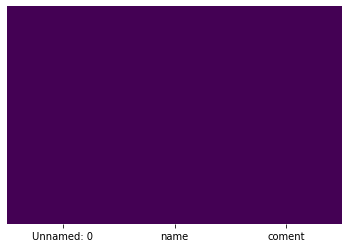

In [9]:
#df['weight'] = df['weight'].fillna(0)
df.dropna(inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.drop([df.columns[0]],axis=1,inplace=True)

In [11]:
df.to_csv('dataset.csv', index = False)
df

,name,coment
0,Abirul Islam,iphone 10 pro 64MP/108MP??
1,Rana Ahmed,Poco X3 pro official ki international??
2,Murad Khan,"redmi 10 pro max, sathe kono gift ache?"
3,Md Faysal Ahmed,Poco x3 Indian version ta ki ase... ??
4,Md Rashedujjaman Reza,redmi Note 10 pro 8/128 gb available nai?
...,...,...
3153,Raihan Raj,Poco x3 pro 8/256 unofficial ache?
3154,শুভ্র শুভ্র,Pixel 4a 5g which variants
3155,Sheikh Shakib,??
3156,Mahmudul Hassan Shuvro,Redmi k30 ultra available?


In [236]:
#df['sex'] = ""
#df['sex'] = np.nan
#df

,name,coment,sex
0,Abirul Islam,iphone 10 pro 64MP/108MP??,NaN
1,Rana Ahmed,Poco X3 pro official ki international??,NaN
2,Murad Khan,"redmi 10 pro max, sathe kono gift ache?",NaN
3,Md Faysal Ahmed,Poco x3 Indian version ta ki ase... ??,NaN
4,Md Rashedujjaman Reza,redmi Note 10 pro 8/128 gb available nai?,NaN
...,...,...,...
3153,Raihan Raj,Poco x3 pro 8/256 unofficial ache?,NaN
3154,শুভ্র শুভ্র,Pixel 4a 5g which variants,NaN
3155,Sheikh Shakib,??,NaN
3156,Mahmudul Hassan Shuvro,Redmi k30 ultra available?,NaN


,name,coment,date,sex
0,Mohammad Tarek Islam Taher,Samsung S7,3w,NaN
1,Naim Hossen,Realme 5i cash add korbo,3w,NaN
2,চুলবুল পান্ডে,Exchange korte paren redmi9 power 28 din use f...,3w,NaN
3,Nahid Hasan,Exchange samsung m02 2 din use.,3w,NaN
4,Rahat Khan,Location?,NaN,NaN
...,...,...,...,...
372,Masud Rana,Infinix note 10 koba acba markat a?,1h,NaN
373,Arif Hossain,আপনাদের চার্জিং পোর্ট মানতে পারলাম না,8h,NaN
374,Md Ziaulhoqe,মার্কেটে পাওয়া যাবে??,8h,NaN
375,Asadul Islam,Mobile Official Outlet is not available at Gaz...,3h,NaN


In [ ]:
for j, k in df.iterrows():
    commenter = str(df.name[j])
    df.sex[j] = gen.predict_gender(en2bn.translate(commenter))

In [14]:
upl = pd.read_csv('file3.csv')
upl.drop([upl.columns[0],upl.columns[1],upl.columns[2],upl.columns[3],upl.columns[4],upl.columns[5],upl.columns[6],upl.columns[9],upl.columns[11]],axis=1,inplace=True)
upl

,Developer,Model,Release date
0,Asus,Asus PadFone,2012/06
1,Asus,Asus PadFone 2,2012/10
2,Asus,Asus PadFone Infinity,2013/04
3,Asus,Asus PadFone Infinity 2,2013/10
4,Asus,Asus PadFone mini,2013/12
...,...,...,...
1326,Apple,Apple iPhone XS,NaN
1327,Apple,Apple iPhone XS Max,NaN
1328,Apple,Apple iPhone SE 2,NaN
1329,Apple,Apple iPhone 12 Mini,NaN


In [15]:
for index, row in upl.iterrows():
    upl.Model[index] = re.sub(r"\([0-9]*\)", "", str(upl.Model[index]))
    upl.Model[index] = re.sub(r"\/.*", "", str(upl.Model[index]))
    upl.Model[index] = re.sub(r"\(.*\)", "", str(upl.Model[index]))
    
    if re.search(str(upl.Developer[index]),str(upl.Model[index]),re.IGNORECASE):
        if len(str(upl.Model[index]).replace(str(upl.Developer[index]),'').strip()) > 6:
            upl.Model[index] = str(upl.Model[index]).replace(str(upl.Developer[index]),'').strip()
            

In [234]:
#test
a = re.sub(r"\([0-9]*\)", "", 'my name is sabbir (2019)')
print(a)

my name is sabbir 


In [168]:
upl.drop_duplicates(inplace = True)

In [169]:
upl.to_csv('phone_list.csv')

In [69]:
modelname = pd.read_csv('phone_list.csv')
modelname.drop([modelname.columns[0], modelname.columns[1], modelname.columns[3]],axis=1,inplace=True)
modelname

model_name = []
for index, row in modelname.iterrows():
    model_prefix = str(modelname.Model[index]).partition(' ')[0].lower()
    if len(model_prefix) > 3: 
        model_name.append(model_prefix)
        
model_name = list(dict.fromkeys(model_name))

In [17]:
upl = pd.read_csv('phone_list.csv')

In [ ]:
#Refining Trainsets

In [68]:
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [70]:
model_name

['padfone',
 'zenfone',
 'pegasus',
 'blackberry',
 'dtek50',
 'dtek60',
 'aurora',
 'keyone',
 'motion',
 'evolve',
 'key2',
 'flare',
 'essential',
 'tattoo',
 'desire',
 'legend',
 'droid',
 'wildfire',
 'gratia',
 'inspire',
 'incredible',
 'thunderbolt',
 'sensation',
 'chacha',
 'amaze',
 'explorer',
 'raider',
 'rezound',
 'butterfly',
 'exodus',
 'honor',
 'play',
 'huawei',
 'ideos',
 'ascend',
 'stream',
 'mate',
 'nova',
 'lenovo',
 'vibe',
 'phab',
 'legion',
 'optimus',
 'stylo',
 'velvet',
 'marshall',
 'meizu',
 'note',
 'motorola',
 'backflip',
 'flipout',
 'atrix',
 'photon',
 'moto',
 'nextbit',
 'nexus',
 'galaxy',
 'nokia',
 'nubia',
 'oneplus',
 'nord',
 'oppo',
 'find',
 'reno3',
 'reno4',
 'reno5',
 'palm',
 'panasonic',
 'pixel',
 'razer',
 'realme',
 'narzo',
 'redmi',
 'ericsson',
 'xperia',
 'surface',
 'phantom',
 'camon',
 'tecno',
 'spark',
 'pouvoir',
 'vivo',
 'x5max+',
 'x5max',
 'xiaomi',
 'black',
 'pocophone',
 'poco',
 'racer',
 'blade',
 'score',
 

In [32]:
for index, row in df.iterrows():
    comment = str(df.coment[index])
    list3 = word_tokenize(comment)
    for x in range(len(list3)):
        min_distance = 100
        maximum_match = list3[x]
        highest_ratio = 0
        for y in range(len(model_name)):
            d = editdistance.eval(list3[x], str(model_name[y]))
            e = levenshtein_ratio_and_distance(list3[x], str(model_name[y]))
            if d < 3 and d >= 0 and d < min_distance and e > 0.55 and e > highest_ratio:
                min_distance = d
                highest_ratio = e
                maximum_match = str(model_name[y])

        list3[x] = maximum_match
    df.coment[index] = " ".join(list3)

In [33]:
df.to_csv('refined_dataset.csv')

In [431]:
#Making of Train sets

In [28]:
list1 = np.arange(0,3000,1).tolist()
df_trainset = pd.DataFrame(index = list1, columns = ['model','comment','sentiment','sex'])
upl = upl.iloc[::-1]
gen = gp.BN_gen_pred()
#en2bn = Translator(from_lang = 'en', to_lang = 'bn')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.1 when using version 0.22.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [34]:
upl

,Unnamed: 0,Developer,Model,Release date
1276,1330,Apple,iPhone XR,NaN
1275,1329,Apple,iPhone 12 Mini,NaN
1274,1328,Apple,iPhone SE 2,NaN
1273,1327,Apple,iPhone XS Max,NaN
1272,1326,Apple,iPhone XS,NaN
...,...,...,...,...
4,4,Asus,PadFone mini,2013/12
3,3,Asus,PadFone Infinity 2,2013/10
2,2,Asus,PadFone Infinity,2013/04
1,1,Asus,PadFone 2,2012/10


In [35]:
count = 1
print('ট্রেইন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....')
for j, k in df.iterrows():
    comment = str(df.coment[j])
    commenter = str(df.name[j])
    #print(commenter)
    for index, row in upl.iterrows():
        model = str(upl.Model[index])
    
        if re.search(model,comment,re.IGNORECASE):
            df_trainset.model[count] = model
            df_trainset.comment[count] = comment
            
            #df_trainset.sex[count] = gen.predict_gender(en2bn.translate(commenter))
            #print(df_trainset.sex[count])
            count = count +1
            break
            
        else: continue
print("ট্রেইন সেট সফল ভাবে বানানো হয়েছে")

ট্রেইন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....
ট্রেইন সেট সফল ভাবে বানানো হয়েছে


In [ ]:
for j, k in df.iterrows():
    commenter = str(df.name[j])
    commenter = en2bn.translate(commenter)
    print(commenter)
    print(gen.predict_gender(commenter))

In [36]:
df_trainset.dropna(inplace = True, how ='all')
#df_trainset.drop_duplicates(inplace = True)
df_trainset

,model,comment,sentiment,sex
1,iPhone 10,iphone 10 oppo 64MP/108MP ? ?,NaN,NaN
2,POCO X3,poco X3 oppo official ki international ? ?,NaN,NaN
3,Redmi 1,"redmi 10 oppo mate , mate honor gift ache ?",NaN,NaN
4,POCO X3,poco x3 Indian version ta ki mate ... ? ?,NaN,NaN
5,Mi Note 10,redmi note 10 oppo 8/128 gb available nai ?,NaN,NaN
...,...,...,...,...
1379,OnePlus 7T,oneplus 7t ki stock a asbe abr ?,NaN,NaN
1380,OnePlus 8,oneplus 8 Official ? ? ?,NaN,NaN
1381,POCO X3,poco x3 oppo 8/256 unofficial ache ?,NaN,NaN
1382,Pixel 4a,pixel 4a 5g watch variants,NaN,NaN


In [37]:
df_trainset.to_csv('new_trainset6.csv')

In [38]:
df_trainset

,model,comment,sentiment,sex
1,iPhone 10,iphone 10 oppo 64MP/108MP ? ?,NaN,NaN
2,POCO X3,poco X3 oppo official ki international ? ?,NaN,NaN
3,Redmi 1,"redmi 10 oppo mate , mate honor gift ache ?",NaN,NaN
4,POCO X3,poco x3 Indian version ta ki mate ... ? ?,NaN,NaN
5,Mi Note 10,redmi note 10 oppo 8/128 gb available nai ?,NaN,NaN
...,...,...,...,...
1379,OnePlus 7T,oneplus 7t ki stock a asbe abr ?,NaN,NaN
1380,OnePlus 8,oneplus 8 Official ? ? ?,NaN,NaN
1381,POCO X3,poco x3 oppo 8/256 unofficial ache ?,NaN,NaN
1382,Pixel 4a,pixel 4a 5g watch variants,NaN,NaN


In [241]:
#!pip install google-cloud-translate

In [2]:
def explicit():
    from google.cloud import storage

    # Explicitly use service account credentials by specifying the private key
    # file.
    storage_client = storage.Client.from_service_account_json(
        'thesis-translate-57c203628831.json')

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

In [16]:
explicit()

[]


In [6]:
os.listdir()

['trainset.csv',
 'new_trainset2.csv',
 'new_trainset.csv',
 'thesis-translate-57c203628831.json',
 '.DS_Store',
 'old_trainset.csv',
 'dataset_backup.csv',
 'model_old.ipynb',
 'phone_list_backup.csv',
 'phone_list.csv',
 'data_prep.ipynb',
 'file_big.csv',
 'file3.csv',
 '.ipynb_checkpoints',
 'dataset.csv']

In [41]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r"thesis-translate-57c203628831.json"

In [239]:
#!pip install --upgrade google-cloud-storage

In [43]:
def translate_text(target, text):
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    import six
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, six.binary_type):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)

    #print(u"Text: {}".format(result["input"]))
    #print(u"Translation: {}".format(result["translatedText"]))
    #print(u"Detected source language: {}".format(result["detectedSourceLanguage"]))
    
    return result["translatedText"]

In [44]:
print(translate_text('bn','Hello world. My name is Sabbir'))

ওহে বিশ্ব. আমার নাম সাব্বির


In [30]:
translate_text('bn','Huawei honor 5 phone ache')

Text: Huawei honor 5 phone ache
Translation: হুয়াওয়ে সম্মানিত ৫ টি ফোন ব্যথা
Detected source language: en


In [1]:
translate_text('en','খাবা নাকি ?')

NameError: name 'translate_text' is not defined

In [22]:
f = open('documents.txt', 'w')

In [23]:
c = 0
for x in datalist.comment:
    f.writelines(x)
    f.writelines('\n')
    print(c)
    c = c+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485


In [18]:
datalist
datalist.drop([datalist.columns[0]],axis=1,inplace=True)

In [19]:
datalist

,model,comment,sentiment,sex
0,Realme 8,vai realme 8 er upor ekta review video banan,1,1.0
1,Pixel 4,amar akse Pixel 4 er battery onek valo lagse,1,0.0
2,Redmi 9,redmi 9 er sunset purple color ta just wow,1,0.0
3,Redmi K40,redmi k40/Redmi k40 oppo er price ki rokom not...,1,0.0
4,Poco x3,poco x3 Android 11 use kre valoi,1,0.0
...,...,...,...,...
3129,Pixel 4,Pixel 4 lagbe amr?1,1,NaN
3130,OnePlus 8,oneplus 8 use kortesi dual band wifi valoi net...,1,1.0
3131,Mi Note 10,xiaomi redmi redmi note 10 ( 6+128 ) official ...,1,1.0
3132,Poco x3,dst ami poco x3 kinsi tui o kin,1,1.0


In [254]:
#Making of trained annotation for Amazon Comprehend

In [252]:
list1 = np.arange(0,3000,1).tolist()
comprehend_csv = pd.DataFrame(index = list1, columns = ['File','Line','Begin Offset','End Offset','Type'])

datalist = open('documents.txt')
count = 0
linenum = 0
print('ট্রেইন অ্যানোটেসন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....')
for j in datalist:
    comment = str(j)
    for index, row in upl.iterrows():
        model = str(upl.Model[index])
        
        regexmatch = re.search(model,comment,re.IGNORECASE)
        if regexmatch:
            spanning = regexmatch.span()
            start_anno = spanning[0]
            end_anno = spanning[1]
            
            comprehend_csv['Begin Offset'][count] = start_anno
            comprehend_csv['End Offset'][count] = end_anno
            comprehend_csv.Line[count] = linenum
            
            comprehend_csv.File[count] = 'documents.txt'
            comprehend_csv.Type[count] = 'DEVICE'
            
            count = count +1
            break
            
        else: continue
    
    linenum = linenum+1
print("ট্রেইন অ্যানোটেসন সেট সফল ভাবে বানানো হয়েছে")
comprehend_csv.dropna(inplace = True)
comprehend_csv

ট্রেইন অ্যানোটেসন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....
ট্রেইন সেট সফল ভাবে বানানো হয়েছে


,File,Line,Begin Offset,End Offset,Type
0,documents.txt,0,0,9,DEVICE
1,documents.txt,1,0,7,DEVICE
2,documents.txt,2,0,7,DEVICE
3,documents.txt,3,0,7,DEVICE
4,documents.txt,4,0,11,DEVICE
...,...,...,...,...,...
1143,documents.txt,2863,0,10,DEVICE
1144,documents.txt,2869,0,9,DEVICE
1145,documents.txt,2874,0,7,DEVICE
1146,documents.txt,2875,0,7,DEVICE


In [253]:
comprehend_csv.to_csv('comprehend.csv', index = False)

In [256]:
#Making of test annotation for Amazon Comprehend

In [257]:
list1 = np.arange(0,3000,1).tolist()
comprehend_test_csv = pd.DataFrame(index = list1, columns = ['File','Line','Begin Offset','End Offset','Type'])

datalist = open('testset.txt')
count = 0
linenum = 0
print('Test অ্যানোটেসন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....')
for j in datalist:
    comment = str(j)
    for index, row in upl.iterrows():
        model = str(upl.Model[index])
        
        regexmatch = re.search(model,comment,re.IGNORECASE)
        if regexmatch:
            spanning = regexmatch.span()
            start_anno = spanning[0]
            end_anno = spanning[1]
            
            comprehend_test_csv['Begin Offset'][count] = start_anno
            comprehend_test_csv['End Offset'][count] = end_anno
            comprehend_test_csv.Line[count] = linenum
            
            comprehend_test_csv.File[count] = 'testset.txt'
            comprehend_test_csv.Type[count] = 'DEVICE'
            
            count = count +1
            break
            
        else: continue
    
    linenum = linenum+1
print("Test সেট সফল ভাবে বানানো হয়েছে")
comprehend_test_csv.dropna(inplace = True)
comprehend_test_csv.to_csv('comprehend_test.csv', index = False)
comprehend_test_csv

Test অ্যানোটেসন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....
Test সেট সফল ভাবে বানানো হয়েছে


,File,Line,Begin Offset,End Offset,Type
0,testset.txt,0,16,27,DEVICE
1,testset.txt,2,4,13,DEVICE
2,testset.txt,3,9,18,DEVICE
3,testset.txt,4,16,24,DEVICE
4,testset.txt,5,29,40,DEVICE
5,testset.txt,6,0,8,DEVICE
6,testset.txt,7,8,17,DEVICE
7,testset.txt,9,0,9,DEVICE


In [258]:
#Making of trained annotation for Spacy NER

In [259]:
regexmatch = re.search('iphone x','bara iphone x de',re.IGNORECASE)
spanning = regexmatch.span()

In [260]:
spanning

(5, 13)

In [262]:
new_spanning = (spanning[0],spanning[1],'DEVICE')
new_spanning

(5, 13, 'DEVICE')

In [266]:
ner_list = []
datalist = open('documents.txt')

count = 0
print('ট্রেইন অ্যানোটেসন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....')
for j in datalist:
    comment = str(j)
    for index, row in upl.iterrows():
        model = str(upl.Model[index])
        
        regexmatch = re.search(model,comment,re.IGNORECASE)
        if regexmatch:
            spanning = regexmatch.span()
            new_spanning = (spanning[0],spanning[1],'DEVICE')
            
            spanning_list = []
            spanning_list.append(new_spanning)
            
            spanning_dict = {'entities': spanning_list}
            
            parent_tuple = (comment,spanning_dict)
            
            ner_list.append(parent_tuple)
            
            count = count +1
            break
            
        else: continue
    
print("ট্রেইন অ্যানোটেসন সেট সফল ভাবে বানানো হয়েছে")

ট্রেইন অ্যানোটেসন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....
ট্রেইন অ্যানোটেসন সেট সফল ভাবে বানানো হয়েছে


In [267]:
ner_list

[('iphone 10 pro 64MP/108MP??\n', {'entities': [(0, 9, 'DEVICE')]}),
 ('Poco X3 pro official ki international??\n',
  {'entities': [(0, 7, 'DEVICE')]}),
 ('redmi 10 pro max, sathe kono gift ache?\n',
  {'entities': [(0, 7, 'DEVICE')]}),
 ('Poco x3 Indian version ta ki ase... ??\n',
  {'entities': [(0, 7, 'DEVICE')]}),
 ('redmi Note 10 pro 8/128 gb available nai?\n',
  {'entities': [(0, 11, 'DEVICE')]}),
 ('Vai redmi Note 10 lite available...??\n',
  {'entities': [(4, 15, 'DEVICE')]}),
 ('poco m2 pro 6/128 available?\n', {'entities': [(0, 11, 'DEVICE')]}),
 ('redmi Note 10 6/128 international hobe ki??\n',
  {'entities': [(0, 11, 'DEVICE')]}),
 ('Oneplus 8 dual sim nai?\n', {'entities': [(0, 9, 'DEVICE')]}),
 ('redmi k40 price\n', {'entities': [(0, 9, 'DEVICE')]}),
 ('redmi k40 kobe asbe?\n', {'entities': [(0, 9, 'DEVICE')]}),
 ('redmi Note 10 pro max cn hobe?\n', {'entities': [(0, 11, 'DEVICE')]}),
 ('Poco f3 ni?\n', {'entities': [(0, 7, 'DEVICE')]}),
 ('poco x3 Ata ki made by India...

In [268]:
f1 = open('ner_train.txt', 'w')
f1.write(str(ner_list))

89882

In [270]:
#Testing edit distance

['iphn', 'x', 'dual', 'sim', 'nai']
iphn x dual sim nai


In [370]:
editdistance.eval('iphn', 'iPhone')

3

In [22]:
phonelist = ['iphone', 'redmi', 'honor']

In [23]:
phonex = " ".join(phonelist)

In [25]:
print(phonex)

iphone redmi honor


2

In [14]:
d = editdistance.eval('divers', 'drive')
d

3

In [15]:
e = levenshtein_ratio_and_distance('drive', 'divers')
e

'The strings are 3 edits away'

,Model
0,PadFone
1,PadFone 2
2,PadFone Infinity
3,PadFone Infinity 2
4,PadFone mini
...,...
1272,iPhone XS
1273,iPhone XS Max
1274,iPhone SE 2
1275,iPhone 12 Mini


In [5]:
datalist = pd.read_csv('train.csv')

In [6]:
datalist

,Unnamed: 0,model,comment,sentiment,sex
0,5196,Realme 8,vai realme 8 er upor ekta review video banan,1,1.0
1,4286,Pixel 4,amar akse Pixel 4 er battery onek valo lagse,1,0.0
2,1104,Redmi 9,redmi 9 er sunset purple color ta just wow,1,0.0
3,5148,Redmi K40,redmi k40/Redmi k40 oppo er price ki rokom not...,1,0.0
4,1190,Poco x3,poco x3 Android 11 use kre valoi,1,0.0
...,...,...,...,...,...
3129,2068,Pixel 4,Pixel 4 lagbe amr?1,1,NaN
3130,1573,OnePlus 8,oneplus 8 use kortesi dual band wifi valoi net...,1,1.0
3131,476,Mi Note 10,xiaomi redmi redmi note 10 ( 6+128 ) official ...,1,1.0
3132,2542,Poco x3,dst ami poco x3 kinsi tui o kin,1,1.0


In [53]:
list1 = np.arange(0,5000,1).tolist()
comprehend_csv = pd.DataFrame(index = list1, columns = ['File','Line','Begin Offset','End Offset','Type'])

datalist = pd.read_csv('train.csv')
datalist.drop([datalist.columns[0]],axis=1,inplace=True)
count = 0
linenum = 0
print('ট্রেইন অ্যানোটেসন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....')
for j, k in datalist.iterrows():
    comment = str(datalist.comment[j])
    model = str(datalist.model[j])
        
    regexmatch = re.search(model,comment,re.IGNORECASE)
    if regexmatch:
        spanning = regexmatch.span()
        start_anno = spanning[0]
        end_anno = spanning[1]

        comprehend_csv['Begin Offset'][count] = start_anno
        comprehend_csv['End Offset'][count] = end_anno
        comprehend_csv.Line[count] = linenum

        comprehend_csv.File[count] = 'documents.txt'
        comprehend_csv.Type[count] = 'DEVICE'

        count = count +1
        

    
    
    linenum = linenum+1
print("ট্রেইন অ্যানোটেসন সেট সফল ভাবে বানানো হয়েছে")
comprehend_csv.dropna(inplace = True)
comprehend_csv

ট্রেইন অ্যানোটেসন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....
ট্রেইন অ্যানোটেসন সেট সফল ভাবে বানানো হয়েছে


,File,Line,Begin Offset,End Offset,Type
0,documents.txt,0,4,12,DEVICE
1,documents.txt,1,10,17,DEVICE
2,documents.txt,2,0,7,DEVICE
3,documents.txt,3,0,9,DEVICE
4,documents.txt,4,0,7,DEVICE
...,...,...,...,...,...
3092,documents.txt,3129,0,7,DEVICE
3093,documents.txt,3130,0,9,DEVICE
3094,documents.txt,3131,16,26,DEVICE
3095,documents.txt,3132,8,15,DEVICE


In [41]:
comprehend_csv.to_csv('compre_train.csv', index = False)

In [36]:
ef = pd.read_csv('compre_train.csv')
ef.drop([ef.columns[0]],axis=1,inplace=True)
ef.to_csv('compre_train.csv')

In [54]:
ner_list = []
datalist = pd.read_csv('train.csv')
datalist.drop([datalist.columns[0]],axis=1,inplace=True)
count = 0

print('ট্রেইন অ্যানোটেসন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....')
for j, k in datalist.iterrows():
    comment = str(datalist.comment[j])
    model = str(datalist.model[j])
        
    regexmatch = re.search(model,comment,re.IGNORECASE)
    if regexmatch:
        spanning = regexmatch.span()
        new_spanning = (spanning[0],spanning[1],'DEVICE')

        spanning_list = []
        spanning_list.append(new_spanning)

        spanning_dict = {'entities': spanning_list}

        parent_tuple = (comment,spanning_dict)

        ner_list.append(parent_tuple)

        count = count +1

print("ট্রেইন অ্যানোটেসন সেট সফল ভাবে বানানো হয়েছে")


ট্রেইন অ্যানোটেসন সেট বানানো হচ্ছে। অনুঘ্রহ করে অপেক্ষা করুন....
ট্রেইন অ্যানোটেসন সেট সফল ভাবে বানানো হয়েছে


In [55]:
ner_list

[('vai realme 8 er upor ekta review video banan',
  {'entities': [(4, 12, 'DEVICE')]}),
 ('amar akse Pixel 4 er battery onek valo lagse',
  {'entities': [(10, 17, 'DEVICE')]}),
 ('redmi 9 er sunset purple color ta just wow',
  {'entities': [(0, 7, 'DEVICE')]}),
 ('redmi k40/Redmi k40 oppo er price ki rokom note flare ?',
  {'entities': [(0, 9, 'DEVICE')]}),
 ('poco x3 Android 11 use kre valoi', {'entities': [(0, 7, 'DEVICE')]}),
 ('ai face unlock ase Pixel 4 e', {'entities': [(19, 26, 'DEVICE')]}),
 ('Portrait mode with advanced bokeh and Depth Control ase iphone 12 e',
  {'entities': [(56, 65, 'DEVICE')]}),
 ('vai poco f3 mate ? ?', {'entities': [(4, 11, 'DEVICE')]}),
 ('fast cahrge hoyna iphone 11 e', {'entities': [(18, 27, 'DEVICE')]}),
 ('keu realme 8 rough use korsen?', {'entities': [(4, 12, 'DEVICE')]}),
 ('eto baje pic quality wrost oneplus 8 er?0',
  {'entities': [(27, 36, 'DEVICE')]}),
 ('Pixel 4 naki valoi krse sunlam', {'entities': [(0, 7, 'DEVICE')]}),
 ('ভাই redmi 9 unoffi

In [66]:
spc = open('spacy.txt', 'w')


In [67]:
for x in ner_list:
    spc.writelines(str(x)+',\n')